# Load the data relative to the county profiles in California

In [6]:
%matplotlib inline

# Data handling
import pandas as pd
import numpy as np
# import scipy as sp

# Graphing capabilities
import matplotlib.pyplot as plt
# import seaborn as sns

import json
import pickle

In [13]:
params = { 'axes.grid': True
          ,'axes.axisbelow': True
          ,'grid.color': '0.5'
          ,'legend.numpoints': 1
          ,'savefig.bbox': 'tight'
          ,'font.size': 16
          ,'legend.loc': 'best'
          ,'legend.fontsize': 'medium'
          #,'lines.markersize': 6
          ,'xtick.labelsize': 'small'
          ,'ytick.labelsize': 'small'
          #,'xtick.direction': 'out'
          #,'ytick.direction': 'out'
          #,'text.usetex': False
          ,'figure.figsize': [8, 6]
          #,'axes.labelsize': 'large'   # no need to change these sizes, just change font.size
          #,'axes.titlesize': 'x-large'
}
plt.rcParams.update(params)

Load data for all counties

In [18]:
# county_names = np.array(json.load(open('county_names.json','r')))
county_names = pickle.load(open('county_names.pkl','rb'))

In [19]:
# fout = open('county_names.pkl','wb')
# pickle.dump(county_names,fout,2)
# fout.close()

### Population by Age Group

In [20]:
fin= open('raw/Population_AgeGroup_byCounty.csv','r')
# header
line= fin.readline()
header= line.strip().split(',')[1:]

fin.seek(0)
data_pop= np.loadtxt(fin, delimiter=',', skiprows=1, usecols=(1,2,3,4,5), dtype=np.int)
fin.seek(0)
counties= np.loadtxt(fin, delimiter=',', skiprows=1, usecols=(0,), dtype=np.str)

fin.close()

In [21]:
N_counties = len(counties)
print 'Found %d counties' % N_counties

Found 58 counties


In [22]:
datacumsum_pop= np.cumsum(data_pop,axis=1)[:,:-1]
total= data_pop[:,4]

Check sums

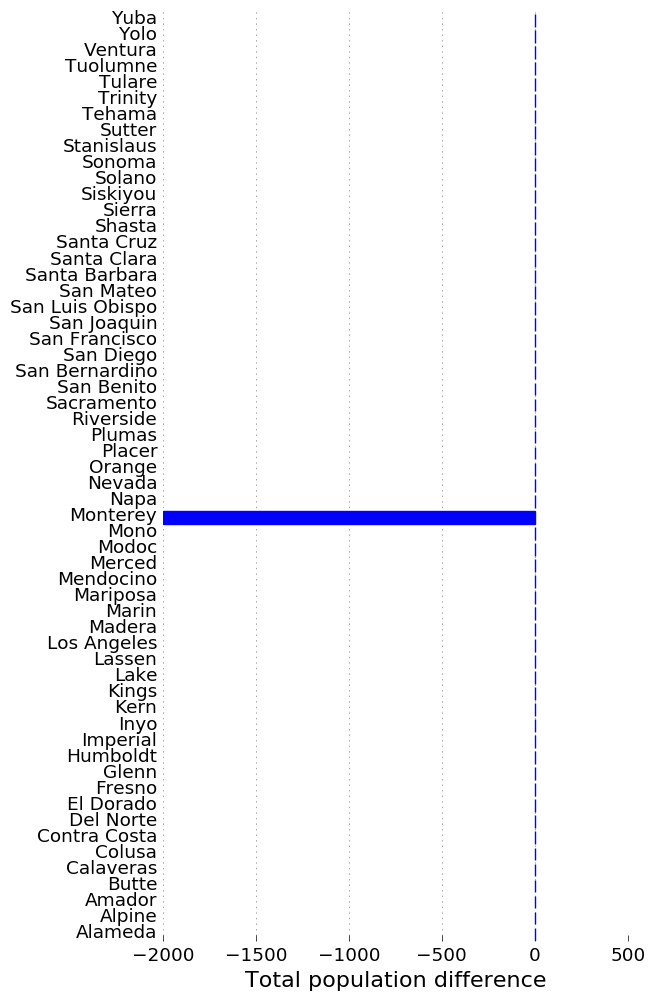

In [50]:
plt.figure(figsize=(6,12))
ax= plt.subplot(111)

inds= np.arange(N_counties)

plt.barh(inds, data_pop[:,4]-datacumsum_pop[:,3], color='b', ec='b')

plt.yticks(inds+0.5,counties)
plt.ylim(0,N_counties)
plt.grid(axis='y')
plt.xlabel('Total population difference')

ax.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')

plt.savefig('TotalPopulationDifference.png')

Monterey county has a problem with the counting

In [51]:
ind_tmp= np.where(counties=='Monterey')[0][0]
print datacumsum_pop[ind_tmp,-1] - total[ind_tmp]

2000


Calculate percentage of population in the age groups

In [52]:
100.*data_pop[ind_tmp]/data_pop[ind_tmp][4]

array([   8.26558455,   18.53220279,   61.94520497,   11.72263508,  100.        ])

1st value is wrong: it should be 7.8%

In [53]:
data_pop[ind_tmp][0] -= 2000
100.*data_pop[ind_tmp][0]/total[ind_tmp]

7.799957162280457

In [54]:
datacumsum_pop= np.cumsum(data_pop,axis=1)[:,:-1]
print 'The population numnber should be %d with a fraction of %.1f%%' % (data_pop[ind_tmp,0], 100.*data_pop[ind_tmp,0]/total[ind_tmp])

The population numnber should be 33503 with a fraction of 7.8%


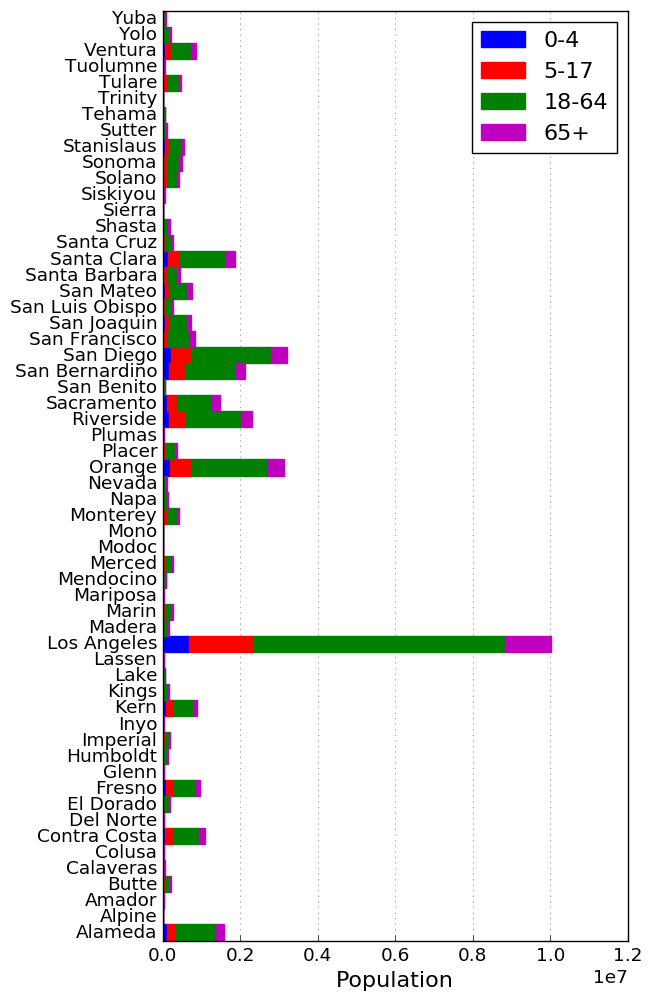

In [67]:
plt.figure(figsize=(6,12))
ax= plt.subplot(111)

inds= np.arange(N_counties)
width= 1

plt.barh(inds, data_pop[:,0], height=width, color='b',ec='b', label=header[0])
plt.barh(inds, data_pop[:,1], height=width, left=datacumsum_pop[:,0], color='r',ec='r', label=header[1])
plt.barh(inds, data_pop[:,2], height=width, left=datacumsum_pop[:,1], color='g',ec='g', label=header[2])
plt.barh(inds, data_pop[:,3], height=width, left=datacumsum_pop[:,2], color='m',ec='m', label=header[3])

plt.legend()
plt.ylim(0,N_counties)
plt.grid(axis='y')
plt.yticks(inds+0.5,counties)
plt.xlabel('Population')

ax.yaxis.set_ticks_position('none')
# ax.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')

plt.savefig('Population_byAgeGroup.png')

In [107]:
fracPop= []
fracPop.append(1.*data_pop[:,0]/total)
fracPop.append(1.*data_pop[:,1]/total)
fracPop.append(1.*data_pop[:,2]/total)
fracPop.append(1.*data_pop[:,3]/total)
fracPop= np.array(fracPop)

fracPop_cumsum= np.cumsum(fracPop, axis=0)

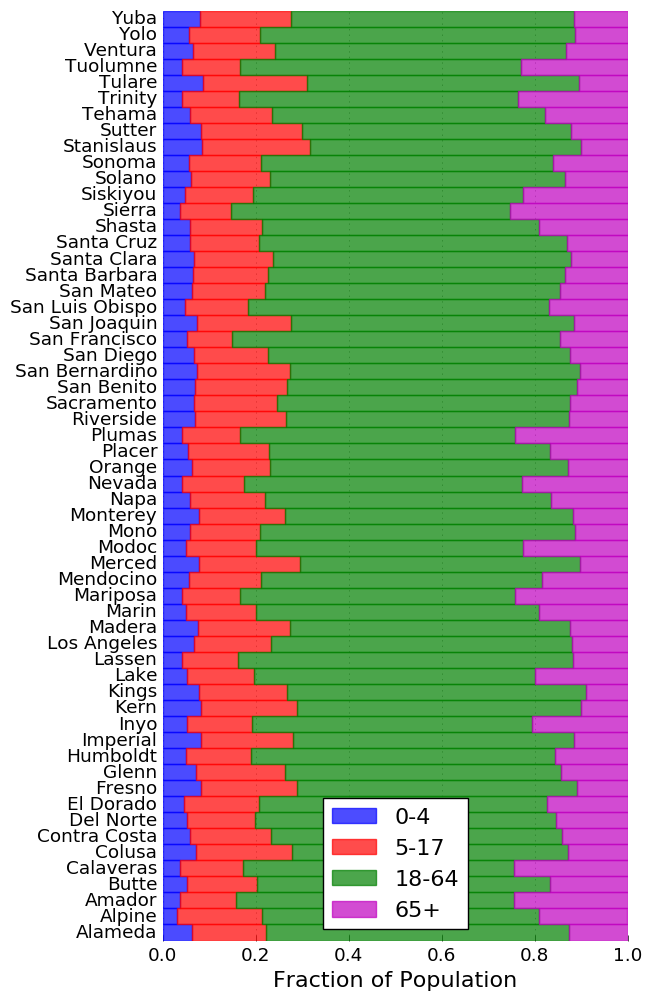

In [112]:
plt.figure(figsize=(6,12))
ax= plt.subplot(111)

inds= np.arange(N_counties)
width= 1

plt.barh(inds, fracPop[0], height=width, color='b',ec='b', label=header[0],alpha=0.7)
plt.barh(inds, fracPop[1], height=width, left=fracPop_cumsum[0], color='r',ec='r', label=header[1],alpha=0.7)
plt.barh(inds, fracPop[2], height=width, left=fracPop_cumsum[1], color='g',ec='g', label=header[2],alpha=0.7)
plt.barh(inds, fracPop[3], height=width, left=fracPop_cumsum[2], color='m',ec='m', label=header[3],alpha=0.7)

plt.legend()
plt.ylim(0,N_counties)
plt.xlim(0,1.)
plt.grid(axis='y')
plt.yticks(inds+0.5,counties)
plt.xlabel('Fraction of Population')

ax.yaxis.set_ticks_position('none')
ax.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')

plt.savefig('PopulationFraction_byAgeGroup.png')

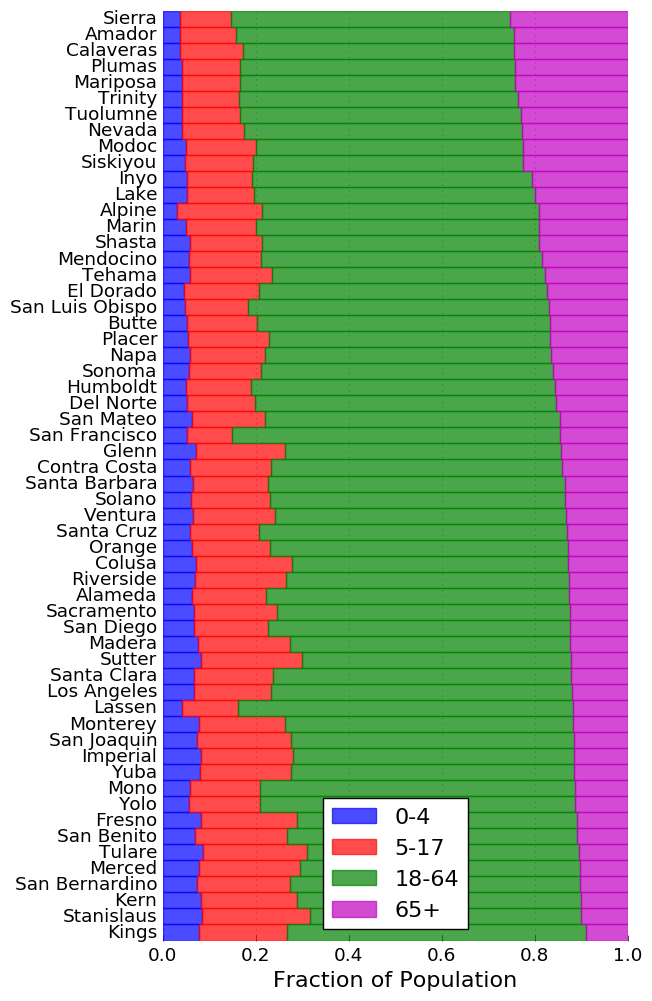

In [116]:
plt.figure(figsize=(6,12))
ax= plt.subplot(111)

inds= np.arange(N_counties)
width= 1

indsSort= np.argsort(fracPop[3])

plt.barh(inds, fracPop[0][indsSort], height=width, color='b',ec='b', label=header[0],alpha=0.7)
plt.barh(inds, fracPop[1][indsSort], height=width, left=fracPop_cumsum[0][indsSort], color='r',ec='r', label=header[1],alpha=0.7)
plt.barh(inds, fracPop[2][indsSort], height=width, left=fracPop_cumsum[1][indsSort], color='g',ec='g', label=header[2],alpha=0.7)
plt.barh(inds, fracPop[3][indsSort], height=width, left=fracPop_cumsum[2][indsSort], color='m',ec='m', label=header[3],alpha=0.7)

plt.legend()
plt.ylim(0,N_counties)
plt.xlim(0,1.)
plt.grid(axis='y')
plt.yticks(inds+0.5,counties[indsSort])
plt.xlabel('Fraction of Population')

ax.yaxis.set_ticks_position('none')
ax.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')

plt.savefig('PopulationFraction_byAgeGroup_sort.png')

*Work on Pandas Save Files*

In [15]:
df = pd.read_csv('corrected/Population_AgeGroup_byCounty.csv')

In [16]:
df

,county,0-4,5-17,18-64,65+,total
0,Alameda,99911,248516,1022113,196707,1567248
1,Alpine,35,210,683,219,1148
2,Amador,1341,4466,22016,9011,36833
3,Butte,11474,33791,140503,37584,223353
4,Calaveras,1692,6109,26210,10992,45004
5,Colusa,1590,4524,13132,2837,22083
6,Contra Costa,62767,189096,679089,153863,1084815
7,Del Norte,1511,4144,18464,4430,28549
8,El Dorado,8414,29251,112898,31798,182360
9,Fresno,79872,199933,585623,107296,972724


### Population by Ethnicity

In [163]:
fin= open('raw/Ethnicity_byCounty.csv','r')
# header
line= fin.readline()
header= line.strip().split(',')[1:]

fin.seek(0)
data_eth= np.loadtxt(fin, delimiter=',', skiprows=1, usecols=(1,2,3,4,5), dtype=np.float)
fin.seek(0)
counties= np.loadtxt(fin, delimiter=',', skiprows=1, usecols=(0,), dtype=np.str)

fin.close()

datacumsum_eth= np.cumsum(data_eth,axis=1)
total= datacumsum_eth[:,4]

In [160]:
print header

['Asian (%)', 'Black (%)', 'Hispanic (%)', 'White (%)', 'Other (%)']


In [151]:
N_counties = len(counties)
print 'Found %d counties' % N_counties

Found 58 counties


Check sums

In [156]:
print np.sort(total/100.)

[ 0.998  0.999  0.999  0.999  0.999  0.999  0.999  0.999  0.999  0.999
  0.999  1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
  1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
  1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
  1.     1.001  1.001  1.001  1.001  1.001  1.001  1.001  1.001  1.001
  1.001  1.001  1.001  1.001  1.001]


In [162]:
datacumsum_eth[:,2]+data_eth[:,3]

array([ 95.8,  80.2,  95.7,  95. ,  95.9,  97.4,  95.9,  89.5,  96.3,
        97.6,  96.6,  90.4,  98.5,  87.5,  97.5,  96.8,  94.1,  94.4,
        97.8,  97.1,  96.7,  94.2,  93.3,  97.9,  94.8,  96.8,  97.3,
        97.5,  96.6,  97.3,  96.3,  94.6,  97.3,  94.8,  98. ,  97.3,
        96.3,  96.4,  96.4,  97.1,  96.5,  97.5,  96.7,  96.8,  94.1,
        97.4,  92. ,  94.2,  96.5,  97.3,  97.2,  95.4,  91.7,  97.8,
        95.9,  97.5,  95.9,  93.5])

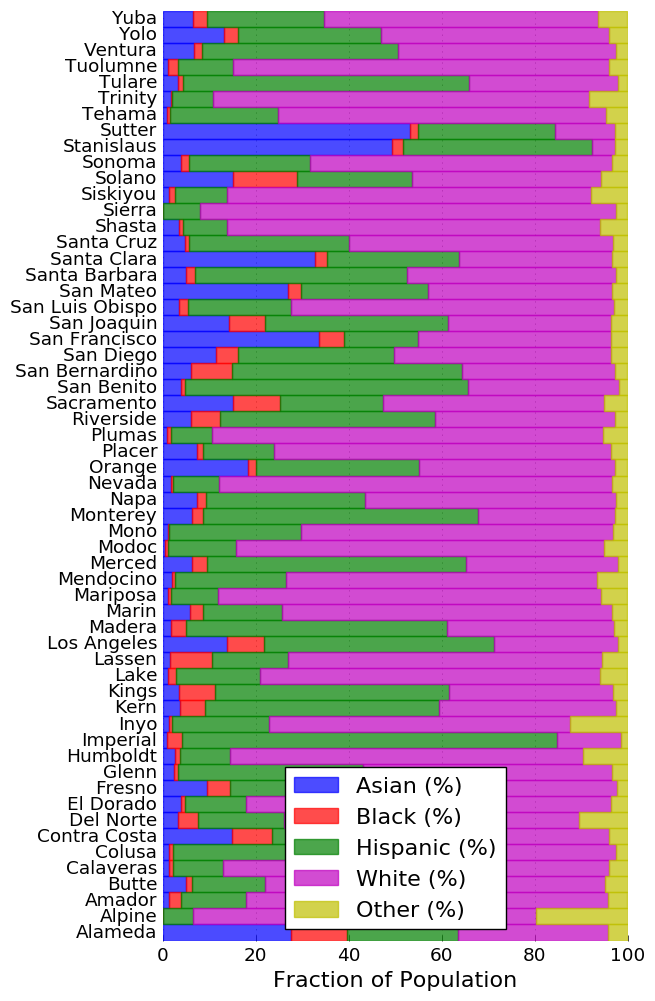

In [169]:
plt.figure(figsize=(6,12))
ax= plt.subplot(111)

inds= np.arange(N_counties)
width= 1
colors=['b','r','g','m','y']

plt.barh(inds, data_eth[:,0], height=width, color='b',ec='b', label=header[0],alpha=0.7)
for i in xrange(1,len(colors)):
    plt.barh(inds, data_eth[:,i], height=width, left=datacumsum_eth[:,i-1], color=colors[i],ec=colors[i], label=header[i],alpha=0.7)

plt.legend()
plt.ylim(0,N_counties)
plt.xlim(0,100.)
plt.grid(axis='y')
plt.yticks(inds+0.5,counties)
plt.xlabel('Fraction of Population')

ax.yaxis.set_ticks_position('none')
ax.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')

plt.savefig('PopulationFraction_byEthnicity.png')

# There's a problem with the population breakdown 

### Risk factors

### Payment Sources

### Hospitalization Charges